In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nhập Input

In [2]:
# nhập hàm f(x, y)
def f(x, y):
    return np.array([(-2*x*y[1]+(4*x**3 - 6*x**2 +2.25*x)*y[0] - 2*np.exp(-x**2)*(1.25*x**2-2.75*x-2))/(1+x**2), y[1]])
# vị trí đầu
a = 0
# vị trí cuối
b = 3
# số mốc
n = 301
# giá trị y0
y0 = np.array([2,2])

In [3]:
# nhập input
def doc_input(ten_file):
    inp = open(ten_file, "r")
    a = float(inp.readline())
    b = float(inp.readline())
    n = int(inp.readline())
    y0 = inp.readline()
    y0 = y0.strip().split()
    y0 = np.array(y0, dtype=float)
    inp.close()
    return a, b, y0, n

Công thức RK 2 bước:
$$
\begin{cases}
k_1 &= hf(x_i, y_i)\\
k_2 &= hf(x_i+h, y_i + k_1)
\end{cases}
$$
$$y_{i+1} = y_i + \frac{1}{2}k_1 + \frac{1}{2}k_2$$

In [4]:
# công thức R-K 2 bước
def RK2(a, b, y0, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [y0]

    for i in range(0, n - 1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h, y[i] + k1)
        print("--------------------")
        print("tại x = ", x[i + 1])
        print("k1 = ", k1)
        print("k2 = ", k2)
        y.append(y[i] + (k1 + k2) / 2)

    return x, np.array(y)

Công thức RK 3 bước:
$$
\begin{cases}
k_1 &= hf(x_i, y_i)\\
k_2 &= hf(x_i+\frac{h}{2}, y_i + \frac{k_1}{2})\\
k_3 &= hf(x_i + h, y_i - k_1 + 2k_2)
\end{cases}
$$
$$y_{i+1} = y_i + \frac{1}{6}k_1 + \frac{1}{3}k_2 + \frac{1}{6}k_3$$

In [5]:
# công thức R-K 3 bước
def RK3(a, b, y0, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [y0]

    for i in range(0, n - 1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(x[i] + h, y[i] - k1 + 2 * k2)
        print("--------------------")
        print("tại x = ", x[i])
        print("k1 = ", k1)
        print("k2 = ", k2)
        print("k3 = ", k3)
        y.append(y[i] + (k1 + 4 * k2 + k3) / 6)

    return x, np.array(y)

Công thức RK 4 bước:
$$
\begin{cases}
k_1 &= hf(x_i, y_i)\\
k_2 &= hf(x_i+\frac{h}{2}, y_i + \frac{k_1}{2})\\
k_3 &= hf(x_i+\frac{h}{2}, y_i + \frac{k_2}{2})\\
k_4 &= hf(x_i + h, y_i + k_3)
\end{cases}
$$
$$y_{i+1} = y_i + \frac{1}{6}k_1+\frac{1}{3}k_2 + \frac{1}{3}k_3 + \frac{1}{6}k_4$$

In [6]:
# công thức R-K 4 bước
def RK4(a, b, y0, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [y0]

    for i in range(0, n - 1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(x[i] + h, y[i] + k3)
        print("--------------------")
        print("tại x = ", x[i])
        print("k1 = ", k1)
        print("k2 = ", k2)
        print("k3 = ", k3)
        print("k4 = ", k4)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)

    return x, np.array(y)

In [7]:
# hàm ghép trơn bậc 3
def ghep_tron_bac_3(x, y):
    S = list()
    h = list()
    m = list()
    lamda = list()
    muy = list()
    d = list()
    alpha = list()
    beta = list()
    phi = list()
    theta = list()

    lamda.append(1)
    muy.append(0)
    d.append(0)
    h.append(x[1] - x[0])

    alpha.append(0)
    beta.append(0)

    for i in range(0, len(x) - 2):
        h.append(x[i + 2] - x[i + 1])
        alpha.append(lamda[i] / (-2 - muy[i] * alpha[i]))
        beta.append((beta[i]*muy[i] - d[i])/(-2 - muy[i] * alpha[i]))
        lamda.append(h[i+1]/(h[i] + h[i+1]))
        muy.append(1 - lamda[i+1])
        d.append(6*((y[i+2] - y[i+1])/h[i+1] - (y[i+1] - y[i])/h[i])/(h[i] + h[i+1]))

    alpha.append(lamda[-1]/(-2 - muy[-1]*alpha[-1]))
    beta.append((beta[-1]*muy[-1] - d[-1])/(-2 - muy[-1]*alpha[-2]))

    lamda.append(0)
    muy.append(1)
    d.append(0)

    m.append((muy[-1]*beta[-1] - d[-1])/(-2 - muy[-1]*alpha[-1]))

    for i in range(len(x) - 2, -1, -1):
        m.append(alpha[i+1]*m[-1] + beta[i+1])
        phi.append(y[i+1]/h[i] - m[-2]*h[i]/6)
        theta.append(y[i]/h[i] - m[-1]*h[i]/6)
        s = list()
        s.append((-m[-1] + m[-2])/(6*h[i]))
        s.append((m[-1]*x[i+1] - m[-2]*x[i])/(2*h[i]))
        s.append((-m[-1]*x[i+1]**2 + m[-2]*x[i]**2)/(2*h[i]) + phi[-1] - theta[-1])
        s.append((m[-1]*x[i+1]**3 - m[-2]*x[i]**3)/(6*h[i]) - phi[-1]*x[i] + theta[-1]*x[i+1])
        S.append(np.array(s))
    S.reverse()
    return S

def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

# vẽ đồ thị
def ve_do_thi(x, y, S):
    # plt.plot(x, y, 'ro')
    for i in range(len(S)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S[i], x_0)[1]
        plt.plot(x_0, y_0, 'b')
    plt.show()

def ve_do_thi_2(x, y, S1, S2):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    plt.legend([Y0[0], Y1[0]], ['y[0]: biến thứ nhất', 'y[1]: biến thứ hai'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

def ve_do_thi_3(x, y, S1, S2, S3):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    for i in range(len(S3)):
        x_2 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_2 = hoocne_quatient(S2[i], x_2)[1]
        Y2 = plt.plot(x_2, y_2, 'b')
    plt.legend([Y0[0], Y1[0], Y2[0]], ['y[0]', 'y[1]', 'y[2]'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

    plt.plot(y[:, 0], y[:, 2], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[2]')
    plt.show()

    plt.plot(y[:, 1], y[:, 2], 'y')
    plt.xlabel('y[1]')
    plt.ylabel('y[2]')

In [8]:
bac = y0.shape[0]

Kết quả RK 2 bước

R-K 2 bước:
--------------------
tại x =  0.01
k1 =  [0.04 0.02]
k2 =  [0.04058223 0.0202    ]
--------------------
tại x =  0.02
k1 =  [0.04058227 0.020201  ]
k2 =  [0.04112811 0.02040301]
--------------------
tại x =  0.03
k1 =  [0.04112819 0.02040402]
k2 =  [0.04163632 0.02060806]
--------------------
tại x =  0.04
k1 =  [0.04163642 0.02060908]
k2 =  [0.04210554 0.02081517]
--------------------
tại x =  0.05
k1 =  [0.04210565 0.0208162 ]
k2 =  [0.04253452 0.02102436]
--------------------
tại x =  0.06
k1 =  [0.04253462 0.0210254 ]
k2 =  [0.04292201 0.02123566]
--------------------
tại x =  0.07
k1 =  [0.04292211 0.02123671]
k2 =  [0.04326686 0.02144908]
--------------------
tại x =  0.08
k1 =  [0.04326693 0.02145014]
k2 =  [0.04356793 0.02166464]
--------------------
tại x =  0.09
k1 =  [0.04356798 0.02166571]
k2 =  [0.04382419 0.02188237]
--------------------
tại x =  0.1
k1 =  [0.04382419 0.02188345]
k2 =  [0.04403463 0.02210229]
--------------------
tại x =  0.11
k1 =  [0.0440345

C:\Users\Admin\AppData\Local\Temp\ipykernel_19668\3247859234.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


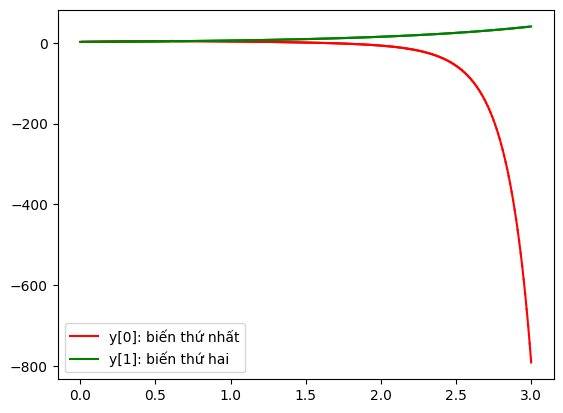

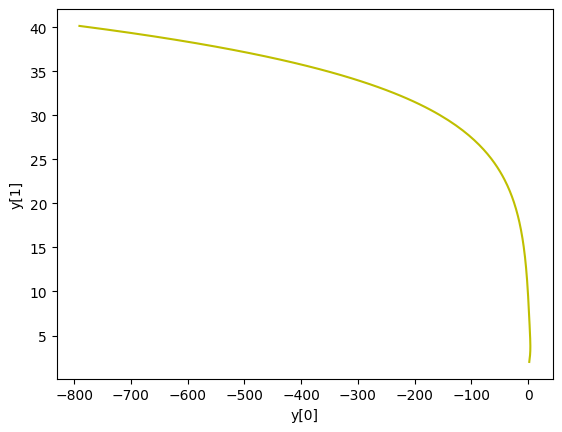

In [9]:
# in ra kết quả của R-K 2 bước
print("R-K 2 bước:")
x, y = RK2(a, b, y0, n)
print("=========================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])


Kết quả RK 3 bước

R-K 3 bước:
--------------------
tại x =  0.0
k1 =  [0.04 0.02]
k2 =  [0.04029559 0.0201    ]
k3 =  [0.04058232 0.020202  ]
--------------------
tại x =  0.01
k1 =  [0.04058227 0.020201  ]
k2 =  [0.04085985 0.02030201]
k3 =  [0.04112827 0.02040503]
--------------------
tại x =  0.02
k1 =  [0.04112819 0.02040403]
k2 =  [0.04138708 0.02050605]
k3 =  [0.04163652 0.02061011]
--------------------
tại x =  0.03
k1 =  [0.04163642 0.02060909]
k2 =  [0.04187597 0.02071214]
k3 =  [0.04210577 0.02081724]
--------------------
tại x =  0.04
k1 =  [0.04210566 0.02081622]
k2 =  [0.04232523 0.0209203 ]
k3 =  [0.04253475 0.02102646]
--------------------
tại x =  0.05
k1 =  [0.04253464 0.02102542]
k2 =  [0.04273362 0.02113055]
k3 =  [0.04292223 0.02123778]
--------------------
tại x =  0.06
k1 =  [0.04292213 0.02123673]
k2 =  [0.04309993 0.02134291]
k3 =  [0.04326704 0.02145122]
--------------------
tại x =  0.07
k1 =  [0.04326696 0.02145016]
k2 =  [0.04342301 0.02155741]
k3 =  [0.04356807 0.02166681]
-

C:\Users\Admin\AppData\Local\Temp\ipykernel_19668\3247859234.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


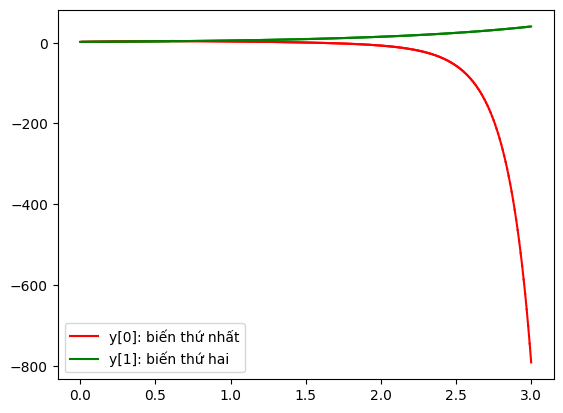

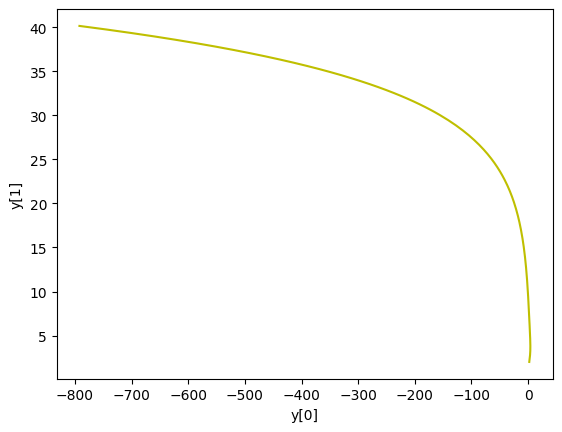

In [10]:
# in ra kết quả của R-K 3 bước
print("R-K 3 bước:")
x, y = RK3(a, b, y0, n)
print("=========================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Kết quả RK4 bước

R-K 4 bước:
--------------------
tại x =  0.0
k1 =  [0.04 0.02]
k2 =  [0.04029559 0.0201    ]
k3 =  [0.0402956 0.0201005]
k4 =  [0.04058227 0.020201  ]
--------------------
tại x =  0.01
k1 =  [0.04058227 0.020201  ]
k2 =  [0.04085985 0.02030201]
k3 =  [0.04085988 0.02030251]
k4 =  [0.04112819 0.02040403]
--------------------
tại x =  0.02
k1 =  [0.04112819 0.02040403]
k2 =  [0.04138708 0.02050605]
k3 =  [0.04138712 0.02050656]
k4 =  [0.04163642 0.02060909]
--------------------
tại x =  0.03
k1 =  [0.04163642 0.02060909]
k2 =  [0.04187597 0.02071214]
k3 =  [0.04187602 0.02071265]
k4 =  [0.04210566 0.02081622]
--------------------
tại x =  0.04
k1 =  [0.04210566 0.02081622]
k2 =  [0.04232523 0.0209203 ]
k3 =  [0.04232528 0.02092082]
k4 =  [0.04253464 0.02102542]
--------------------
tại x =  0.05
k1 =  [0.04253464 0.02102542]
k2 =  [0.04273362 0.02113055]
k3 =  [0.04273367 0.02113107]
k4 =  [0.04292213 0.02123673]
--------------------
tại x =  0.06
k1 =  [0.04292213 0.02123673]
k2 =  [0

C:\Users\Admin\AppData\Local\Temp\ipykernel_19668\3247859234.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


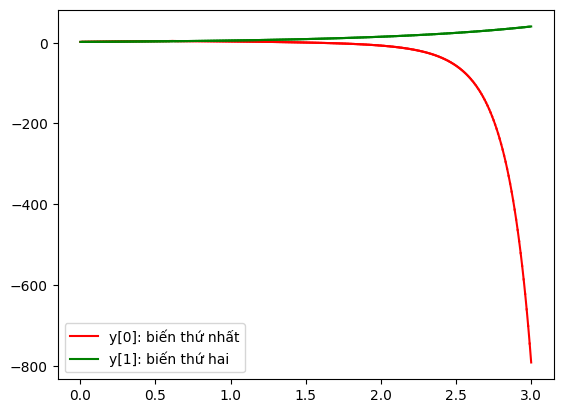

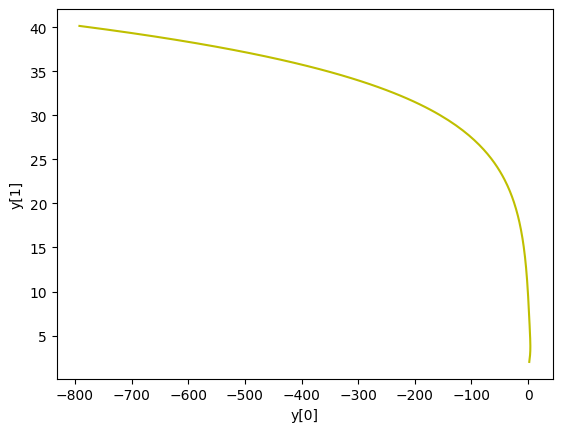

In [11]:
# in ra kết quả của R-K 4 bước
print("R-K 4 bước:")
x, y = RK4(a, b, y0, n)
print("=========================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Thuật toán:\
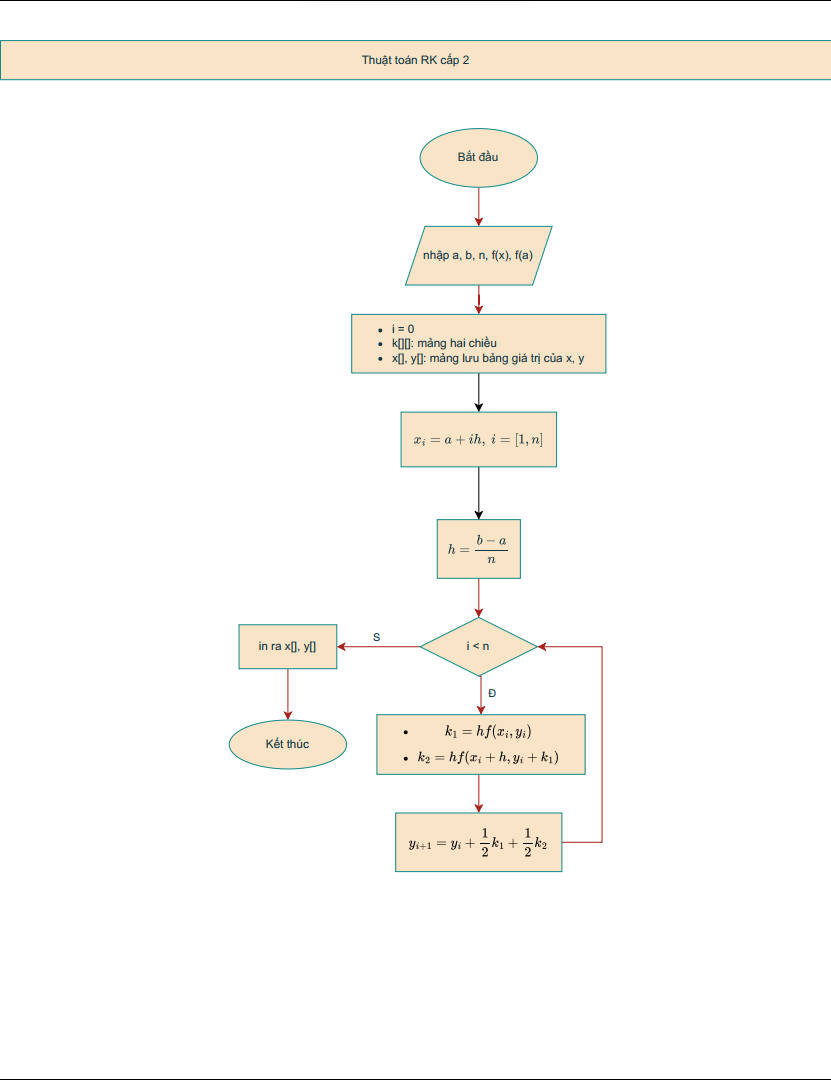\
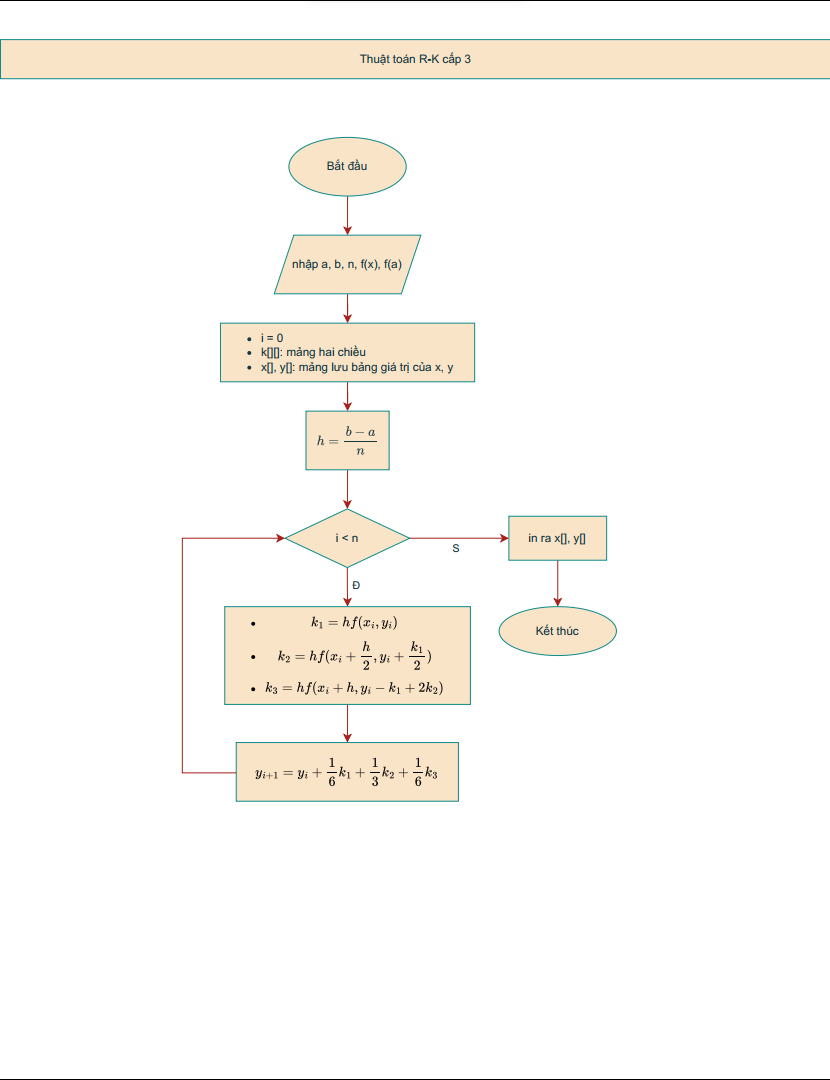\
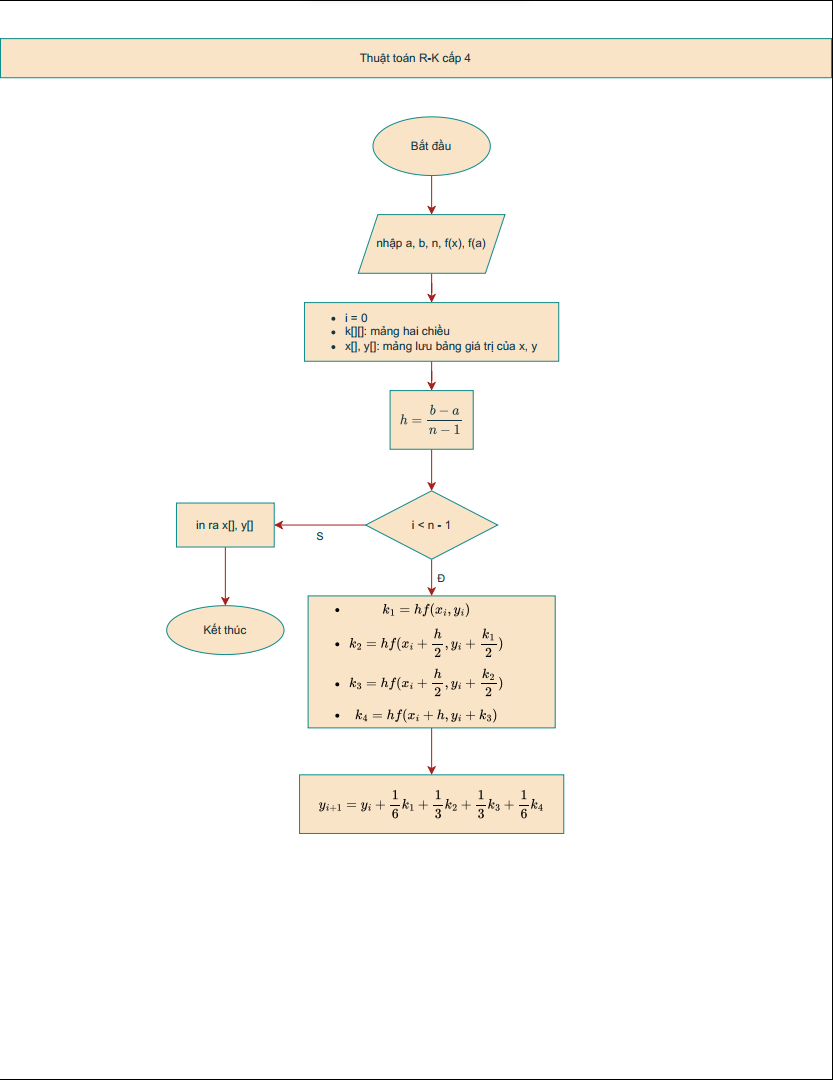